In [2]:
import numpy as np
import pandas as pd

from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
dataset = randn(100)

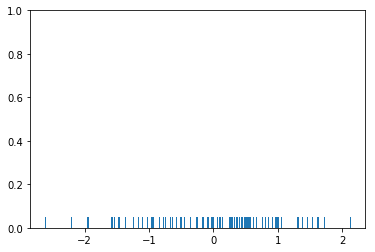

In [4]:
sns.rugplot(dataset)

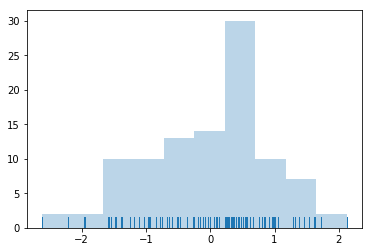

In [7]:
plt.hist(dataset,alpha = 0.3)
sns.rugplot(dataset)

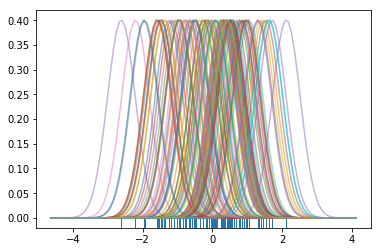

In [10]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max,100)

bandwidth = ((4 * (np.std(dataset)**5)) / (3 * len(dataset))) ** (1/5)

kernel_list = []

for data_point in dataset:
    
    # create a kernel for each point and append it to the kernel
    
    kernel = stats.norm(data_point , bandwidth).pdf(x_axis)
    # pdf stands for probablity density function
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = 0.4 * kernel
    
    kernel_list.append(kernel)
    
    plt.plot(x_axis , kernel , alpha = 0.5)

Text(0.5,0.98,'Sum of the basis funciton')

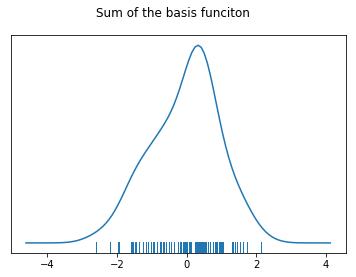

In [12]:
sum_of_kde = np.sum(kernel_list , axis = 0)

fig = plt.plot(x_axis,sum_of_kde)

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis funciton")

All above steps can be done in a single steps also as following

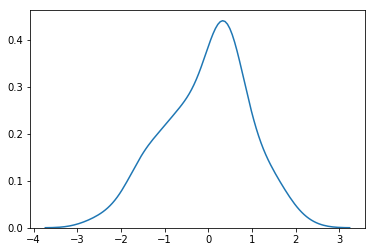

In [13]:
sns.kdeplot(dataset)

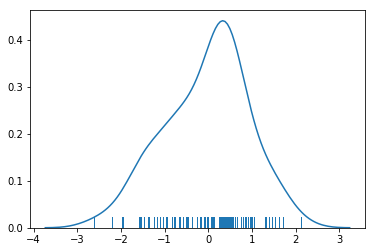

In [14]:
sns.kdeplot(dataset)
sns.rugplot(dataset)

## Plot for different bandwidth

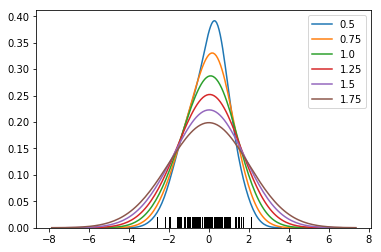

In [16]:
sns.rugplot(dataset , color = "black")

for bandwidth in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw = bandwidth ,label = bandwidth)

## Different types of Kernel functions

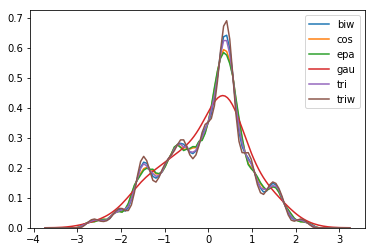

In [18]:
kernel_functions =  ["biw","cos","epa","gau","tri","triw"]
# by default kernel = "gau"

for kern in kernel_functions:
    sns.kdeplot(dataset , kernel = kern , label = kern)

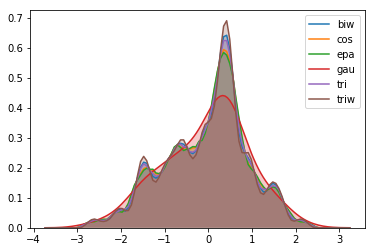

In [19]:
kernel_functions =  ["biw","cos","epa","gau","tri","triw"]

for kern in kernel_functions:
    sns.kdeplot(dataset , kernel = kern , label = kern , shade = True)

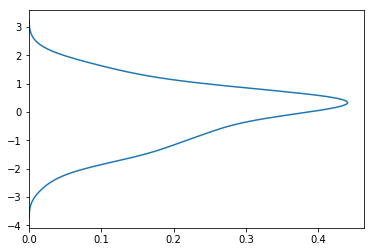

In [20]:
sns.kdeplot(dataset , vertical =True)

### Cumulative Distribution Function

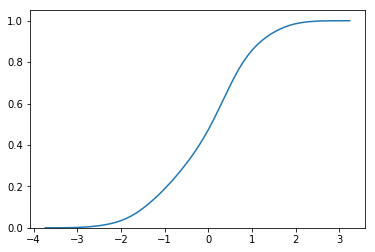

In [21]:
sns.kdeplot(dataset , cumulative = True)

/root/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


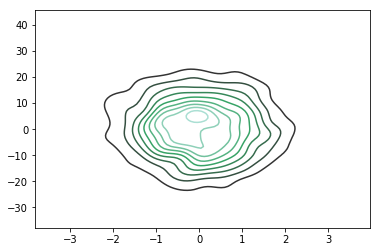

In [23]:
mean =  [0,0]

covariance = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean , covariance , 1000)

dframe = pd.DataFrame(dataset2 , columns = ['X','Y'])

sns.kdeplot(dframe)

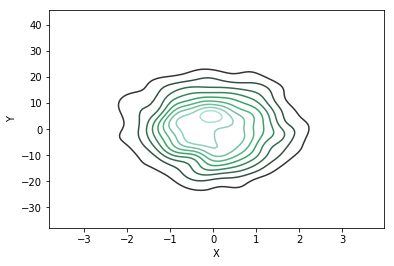

In [25]:
sns.kdeplot(dframe.X , dframe.Y)

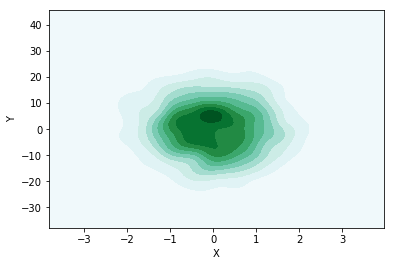

In [26]:
sns.kdeplot(dframe.X , dframe.Y , shade =True)

/root/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


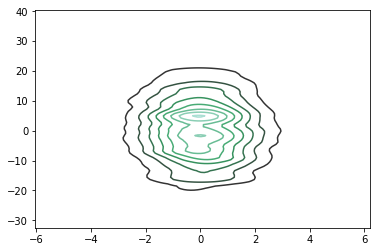

In [27]:
sns.kdeplot(dframe,bw=1)

/root/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


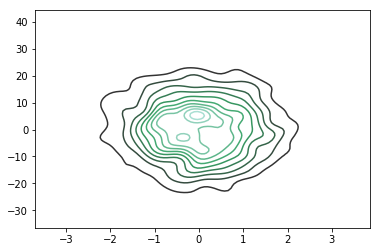

In [28]:
sns.kdeplot(dframe , bw = "silverman")

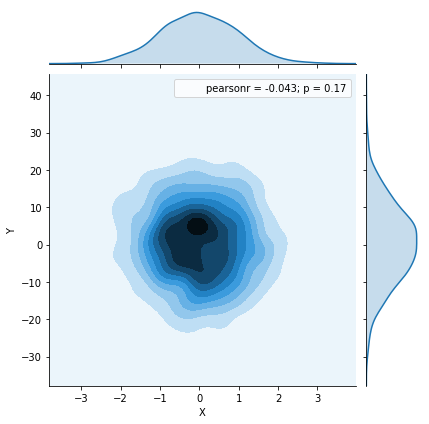

In [30]:
sns.jointplot('X','Y',dframe,kind ='kde')

In [36]:
len(dataset2)

1000

In [37]:
dataset2.shape

(1000, 2)

In [38]:
dataset2

array([[ -0.64324638,   4.54308373],
       [ -0.73478481, -13.588783  ],
       [  0.17154492,  29.1088893 ],
       ...,
       [  1.16542413,  17.86399008],
       [  0.19809511,  13.57816482],
       [  1.75385364,   5.86819188]])